In [18]:
import os
print(os.getcwd())


c:\Users\Lenovo\Desktop\worksight-employee-attrition-risk-intelligence\notebooks


In [19]:
print(os.listdir(".."))


['.git', '.gitignore', 'data', 'docs', 'LICENSE', 'notebooks', 'README.md']


In [20]:
print(os.listdir("../data"))


['raw']


In [21]:
print(os.listdir("../data/raw"))


['employee_attrition.csv']


In [22]:
import pandas as pd

df = pd.read_csv("../data/raw/employee_attrition.csv")
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [10]:
df.shape


(1470, 35)

In [11]:
df['Attrition'].value_counts()


Attrition
No     1233
Yes     237
Name: count, dtype: int64

### Target Variable: Attrition
- Attrition is imbalanced (more employees stayed than left)
- This reflects real-world HR scenarios
- Accuracy alone will not be a reliable metric


In [12]:
df.dtypes


Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

### Feature Types
- Numerical features: Age, MonthlyIncome, YearsAtCompany, etc.
- Categorical features: JobRole, Department, Gender, OverTime, etc.

This distinction will guide preprocessing and model choice.


In [13]:
df.isnull().sum()


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

### Data Quality
- No missing values detected
- Dataset is clean and suitable for modeling


In [14]:
df['OverTime'].value_counts()


OverTime
No     1054
Yes     416
Name: count, dtype: int64

In [15]:
pd.crosstab(df['OverTime'], df['Attrition'])


Attrition,No,Yes
OverTime,,
No,944,110
Yes,289,127


### Early Observation
- Employees working overtime show higher attrition
- Work-life balance is a potential risk driver


In [16]:
!pip install matplotlib seaborn


### Attrition Overview
- Majority of employees did not leave the organization
- Attrition cases are significantly fewer, indicating class imbalance
- This reflects real-world HR data where attrition is a minority event


In [28]:
! pip install pandas numpy matplotlib seaborn scikit-learn


In [29]:
sns.countplot(x='Attrition', data=df)
plt.title("Employee Attrition Distribution")
plt.show()


NameError: name 'sns' is not defined


[notice] A new release of pip is available: 25.2 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached matplotlib-3.10.8-cp313-cp313-win_amd64.whl.metadata (52 kB)
  Using cached scikit_learn-1.8.0-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.61.1-cp313-cp313-win_amd64.whl.metadata (116 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-12.1.0-cp313-cp313-win_amd64.whl.metadata (9.0 kB)
  Using cached scipy-1.17.0-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.5.3-py3-none-any.whl.metadata (5.5 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached matplotlib-3.10.8-cp313-cp313-win_amd64.whl (8.1 MB)
Using cached scikit_learn-1.8.0-cp313-cp313-win_amd64.whl (8.0 MB)
Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl (226 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.61.1-

In [30]:
!pip install matplotlib seaborn


In [31]:
%pip install matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
import seaborn as sns


In [33]:
%pip install pandas numpy matplotlib seaborn scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


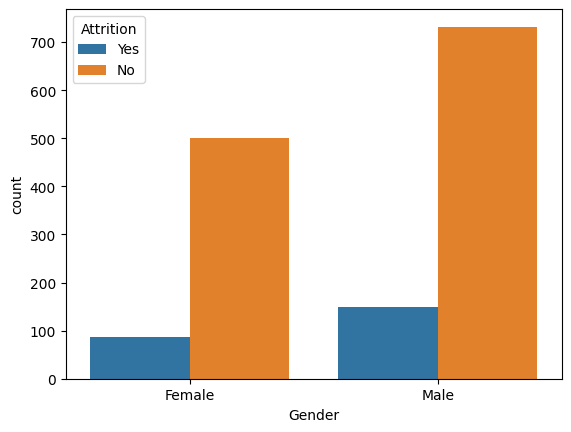

In [35]:
sns.countplot(x='Gender', hue='Attrition', data=df)
plt.show()


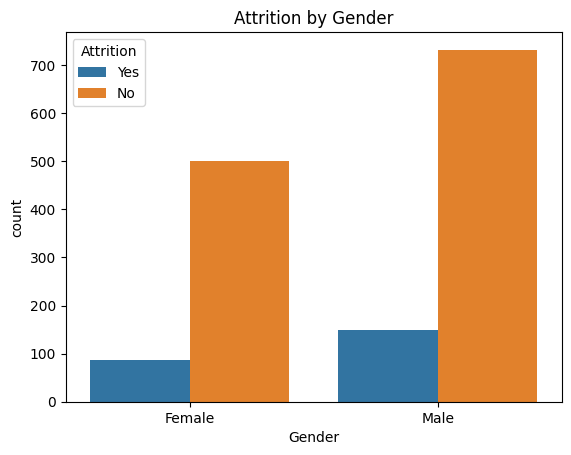

In [36]:
sns.countplot(x='Gender', hue='Attrition', data=df)
plt.title("Attrition by Gender")
plt.show()


### Gender & Attrition
- Attrition appears relatively balanced across genders
- No strong gender-based bias observed at an aggregate level


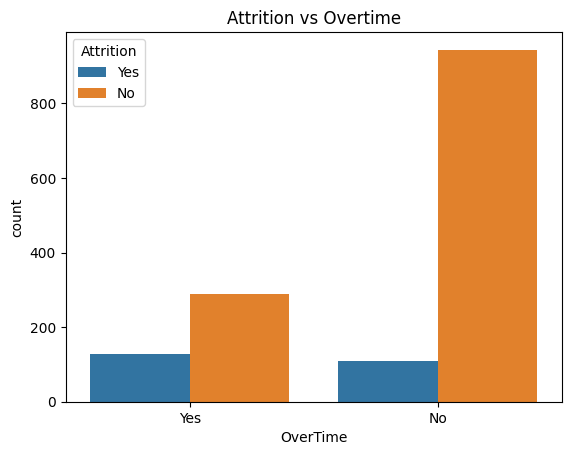

In [37]:
sns.countplot(x='OverTime', hue='Attrition', data=df)
plt.title("Attrition vs Overtime")
plt.show()


### Overtime & Attrition
- Employees working overtime show significantly higher attrition
- Indicates work-life balance as a critical driver of employee retention


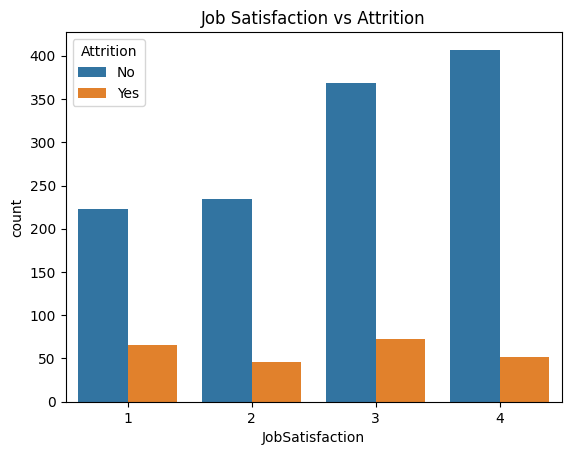

In [38]:
sns.countplot(x='JobSatisfaction', hue='Attrition', data=df)
plt.title("Job Satisfaction vs Attrition")
plt.show()


### Job Satisfaction & Attrition
- Employees with lower job satisfaction tend to leave more frequently
- Improving job satisfaction can significantly reduce attrition risk


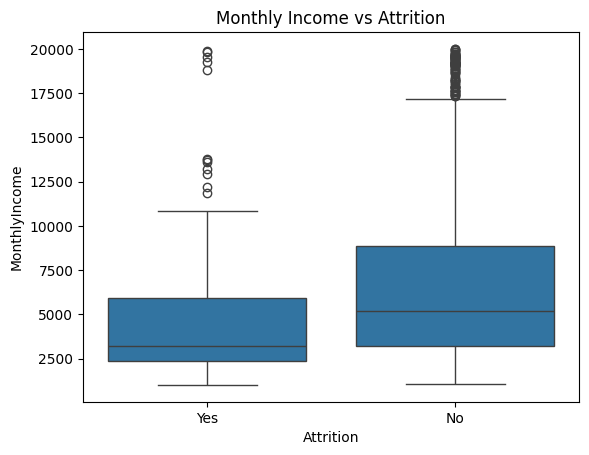

In [39]:
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title("Monthly Income vs Attrition")
plt.show()


### Monthly Income & Attrition
- Employees who left tend to have lower average income
- However, income alone does not fully explain attrition
- Non-monetary factors also play a significant role
